## Bibliotecas

In [49]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import itertools
import heapq

## Dataset Original

In [3]:
dataset = pd.read_csv('/Users/jeanlima/Documents/GitHub/ElectricCurrentRecognition/CreatingDataset/TimeDomain/ElectricCurrentDataset.txt')
dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,Device
0,0.0,1.66,1.84,2.09,1.66,1.24,0.71,0.00,0.60,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Notebook
1,0.0,1.31,1.13,1.59,1.74,1.56,1.35,1.03,0.64,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Notebook
2,0.0,0.96,1.74,1.70,2.02,1.66,1.06,0.53,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Notebook
3,0.0,1.24,2.27,2.02,1.95,1.56,1.13,0.67,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Notebook
4,0.0,1.70,1.77,1.98,1.81,1.13,0.78,0.71,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Notebook


## Combinações de Correntes

In [4]:
classes=[]
for i in dataset['Device']:
    if i not in classes:
        classes.append(i)

In [5]:
#Transformando o Dataframe dataset em matriz
matrix_dataset = list(dataset.as_matrix())

/Users/jeanlima/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [6]:
#transformando cada linha da matriz em um numpy array
for i in range(len(matrix_dataset)):
    matrix_dataset[i] = np.asarray(matrix_dataset[i])

### Dois a dois

In [7]:
for i in range(len(dataset)):
    for j in range(1, len(classes)):
        if i+(200*j)<len(dataset):
            matrix_dataset.append(matrix_dataset[i]+matrix_dataset[i+(200*j)])

### Três a três

In [8]:
num_classes = 4
for i in range(len(dataset)):
    for j in range(1, len(classes)):
        for k in range(1, num_classes):
            if i+(200*j)<len(dataset) and i+(200*(j+num_classes))<len(dataset):
                matrix_dataset.append(matrix_dataset[i] + matrix_dataset[i+(200*j)] + matrix_dataset[i+(200*(j+1))])

### Quatro a quatro

In [9]:
for i in range(200):
    matrix_dataset.append(matrix_dataset[i] + matrix_dataset[i+(200*1)] + matrix_dataset[i+(200*(2))] + matrix_dataset[i+(200*(3))])

In [10]:
#Novo dataset
new_dataset = pd.DataFrame(matrix_dataset)

In [11]:
new_dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,300
0,0.0,1.66,1.84,2.09,1.66,1.24,0.71,0.00,0.60,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Notebook
1,0.0,1.31,1.13,1.59,1.74,1.56,1.35,1.03,0.64,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Notebook
2,0.0,0.96,1.74,1.70,2.02,1.66,1.06,0.53,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Notebook
3,0.0,1.24,2.27,2.02,1.95,1.56,1.13,0.67,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Notebook
4,0.0,1.70,1.77,1.98,1.81,1.13,0.78,0.71,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Notebook


### Classes do Dataset

In [12]:
device_position = 300
classes=[]
for i in new_dataset[device_position]:
    if i not in classes:
        classes.append(i)
print('Exemplos\t Classes\n')
for classe in classes:
    num_exemplos = new_dataset[new_dataset[device_position]==classe].count()[0]
    print(num_exemplos, '\t\t',classe)

Exemplos	 Classes

200 		 Notebook
200 		 Ventilador
200 		 Liquidificador
200 		 Geladeira
200 		 NotebookVentilador
200 		 NotebookLiquidificador
200 		 NotebookGeladeira
200 		 VentiladorLiquidificador
200 		 VentiladorGeladeira
200 		 LiquidificadorGeladeira
200 		 NotebookVentiladorLiquidificadorGeladeira


### Análise dos novos sinais

/Users/jeanlima/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


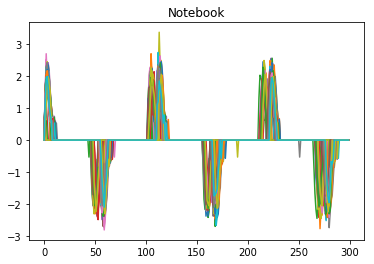

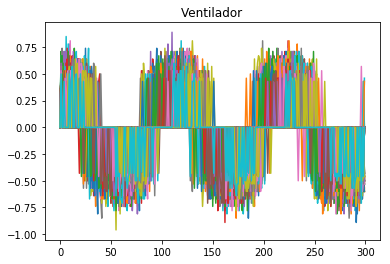

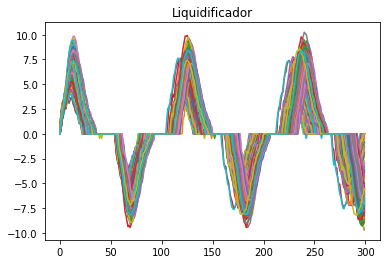

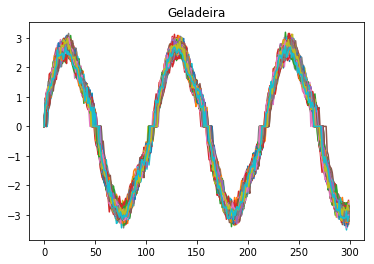

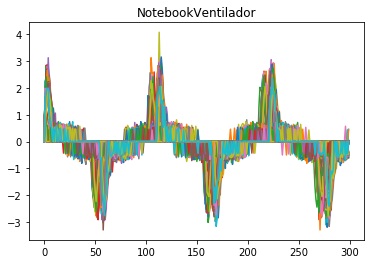

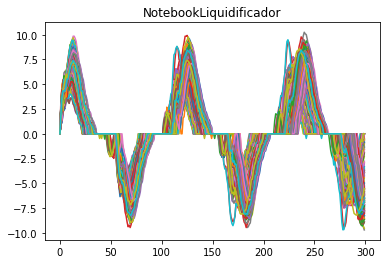

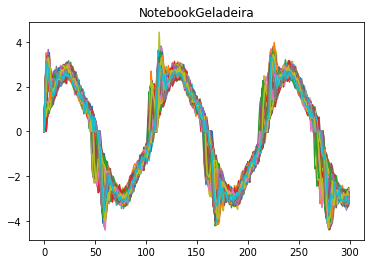

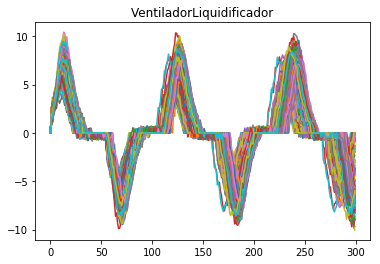

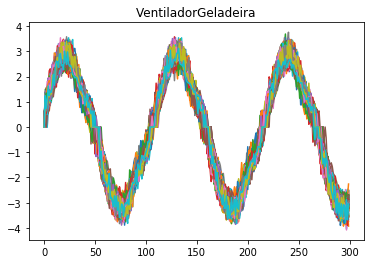

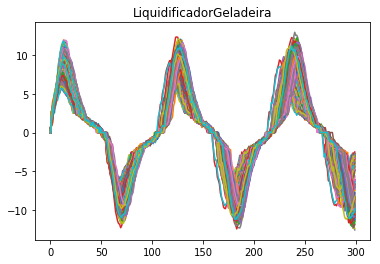

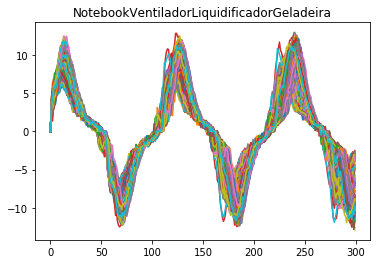

In [13]:
for classe in classes:
    sinal = new_dataset[new_dataset[device_position]==classe]
    sinal.drop([device_position], axis=1, inplace=True)
    for i in range(len(new_dataset)):
        if new_dataset[device_position].loc[i] == classe:
            plt.plot(sinal.loc[i])
    plt.title(classe)
    plt.show()

## Holdout 80/20

In [14]:
y = new_dataset[device_position]
x = new_dataset.drop([device_position], axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.20)

## Treinamento e Teste KNN; K=5

In [15]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)
previsaokNN = knn.predict(X_test)

print('Acurácia:',accuracy_score(Y_test, previsaokNN))

Acurácia: 0.7295454545454545


## Treinamento e Teste NC

In [16]:
nc = NearestCentroid()
nc.fit(X_train, Y_train)
previsaoNC = nc.predict(X_test)

print('Acurácia:',accuracy_score(Y_test, previsaoNC))

Acurácia: 0.7818181818181819


## Treianamento e teste GNB

In [80]:
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
previsaoGNB = gnb.predict(X_test)

accuracy_score(Y_test, previsaoGNB)

0.9181818181818182

## Treinamento e Teste MLP

In [25]:
from math import ceil

#Regra da pirâmide Geométrica para estabelecer número máximo de neurônios
alfa = 0.5
input_neurons = 300
output_neurons = 11
num_neuronios = alfa*((input_neurons* output_neurons)**(1/2))
ceil(num_neuronios)

29

In [29]:
MLP = MLPClassifier(hidden_layer_sizes=(10,10,9),
                     max_iter=1000, 
                     activation='identity', 
                     learning_rate='constant',
                     learning_rate_init=0.00001,
                     batch_size = 128,
                     solver = 'lbfgs')
MLP.fit(X_train, Y_train)
previsaoMLP = MLP.predict(X_test)

print('Acurácia:', accuracy_score(Y_test, previsaoMLP))

Acurácia: 0.9704545454545455


### Obtendo entradas mais importantes para a rede neural

In [81]:
transp_matrix = MLP.coefs_[0].transpose()

most_importants = []
for i in range(len(transp_matrix)):
    biggers = biggers_positions(transp_matrix[i],10)
    for j in biggers:
        if j not in most_importants:
            most_importants.append(j)

In [82]:
def biggers_positions(lista, num):
    positions = []
    i = 0
    maiores = heapq.nlargest(num, lista)
    while i<num:
        for j in range(len(maiores)):
            for k in range(len(lista)):
                if (maiores[j]==lista[k]) and (k not in positions):
                    positions.append(k)
        i+=1
    return positions

In [83]:
most_importants.sort()

print('Entradas mais relevantes:')
print(most_importants)
print()
print(len(most_importants), 'Entradas')

Entradas mais relevantes:
[1, 2, 3, 4, 9, 10, 11, 12, 19, 26, 32, 34, 35, 36, 37, 38, 39, 40, 42, 49, 50, 51, 52, 53, 58, 59, 60, 92, 94, 95, 97, 98, 101, 104, 105, 109, 110, 113, 115, 118, 120, 121, 124, 136, 150, 152, 153, 159, 160, 164, 180, 182, 186, 207, 210, 217, 219, 222, 223, 224, 231, 264, 265, 290]

64 Entradas


In [84]:
confusion_matrix(Y_test, previsaoMLP)

array([[44,  0,  0,  0,  0,  0,  0,  0,  0,  5,  0],
       [ 0, 41,  0,  0,  0,  0,  0,  0,  0,  0,  3],
       [ 0,  0, 45,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 45,  0,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 34,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 25,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 37,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 47,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 52,  0,  0],
       [ 3,  0,  0,  0,  0,  0,  0,  0,  0, 39,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0,  0,  0, 18]])